# Libs

In [1]:
%matplotlib inline

import os

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import skimage
import os
import seaborn as sns

import cv2

import sys
sys.path.append('../scripts/')

from Annotation_functions import draw_annotations, get_boxes, get_filtered_bboxes, morph_op

# Checking the idea of segmentation by Hue

loading image

In [2]:
bacteria = cv2.imread('../pictures/test_input_5.bmp')

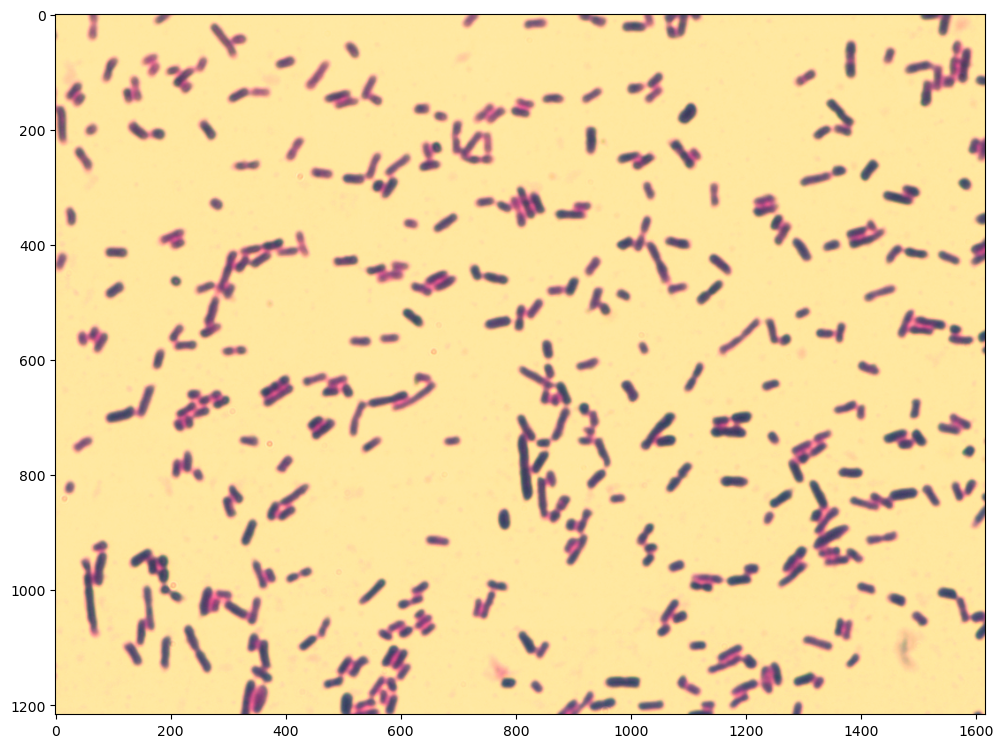

In [3]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria[:,:,::-1])
plt.show()

filtering image (by downscaling and upscaling)

In [4]:
bacteria_filtered = cv2.resize(np.round(np.uint8(skimage.measure.block_reduce(bacteria, (2,2,1), np.mean, func_kwargs={'dtype': np.float16}))),
                                bacteria.shape[:-1][::-1], interpolation = cv2.INTER_CUBIC)

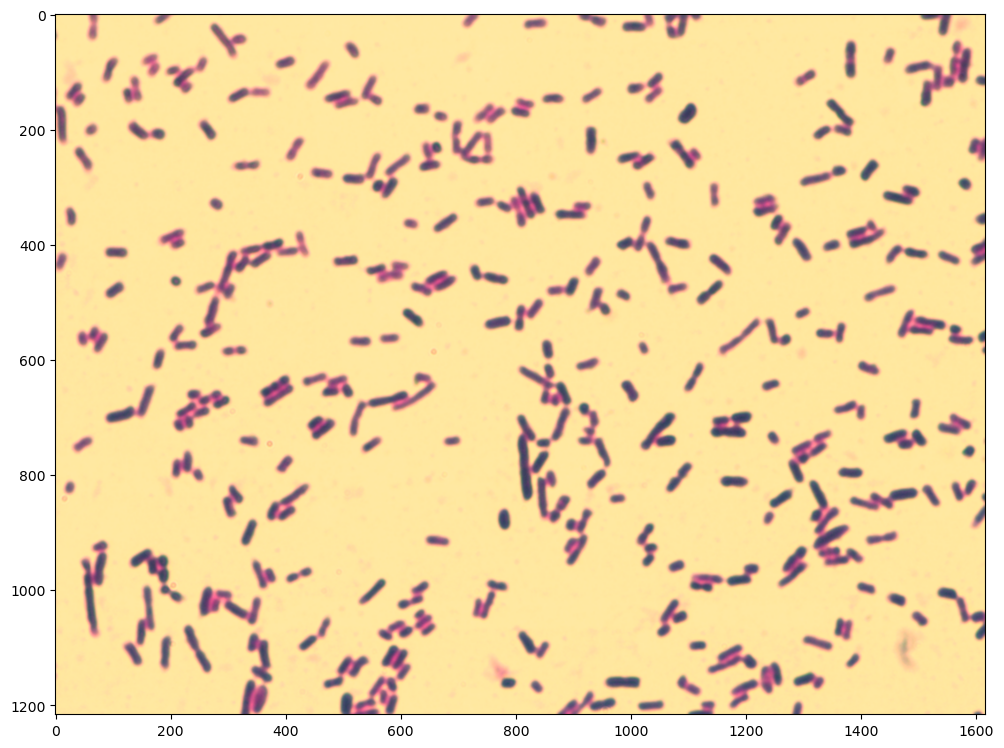

In [5]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria_filtered[:,:,::-1])
plt.show()

Hue inspection

In [6]:
bacteria_filtered_hsv = cv2.cvtColor(bacteria_filtered, cv2.COLOR_BGR2HSV)

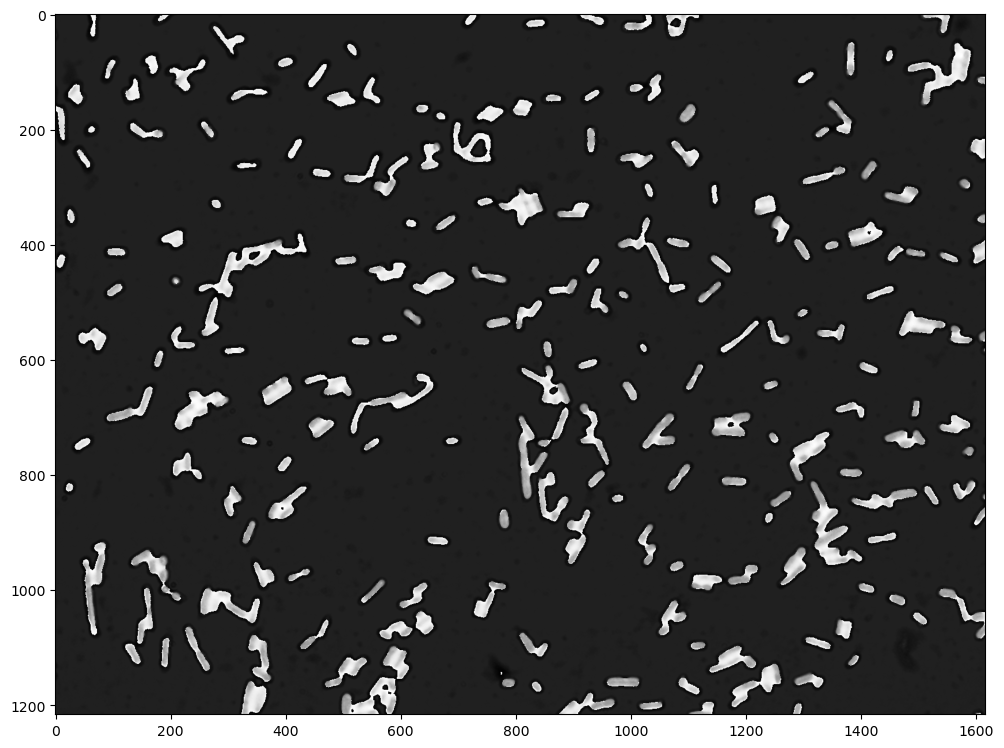

In [7]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria_filtered_hsv[:,:,0], cmap = 'gray')
plt.show()

In [8]:
bacteria_filtered_hsv_histogram = np.histogram(bacteria_filtered_hsv[:,:,0].flatten(), bins=[el for el in range(180)])

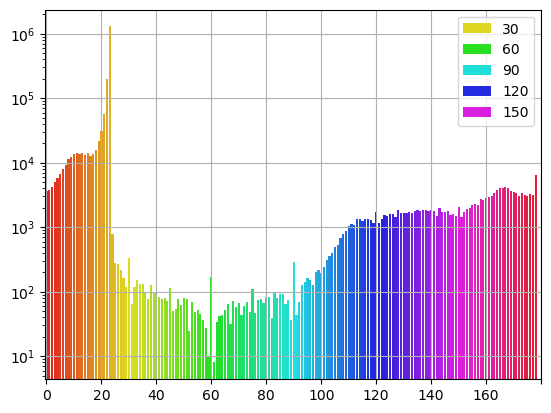

In [9]:
sns.barplot(x = bacteria_filtered_hsv_histogram[1][0:-1], y = bacteria_filtered_hsv_histogram[0], hue = bacteria_filtered_hsv_histogram[1][1:], palette='hsv')
plt.yscale('log')
plt.xticks(np.arange(0,181,20))
plt.grid()
plt.show()

Thresholding by hue

In [10]:
threshold_value, bacteria_filtered_hsv_thresholded = cv2.threshold(bacteria_filtered_hsv[:,:,0],60,180,cv2.THRESH_TOZERO)

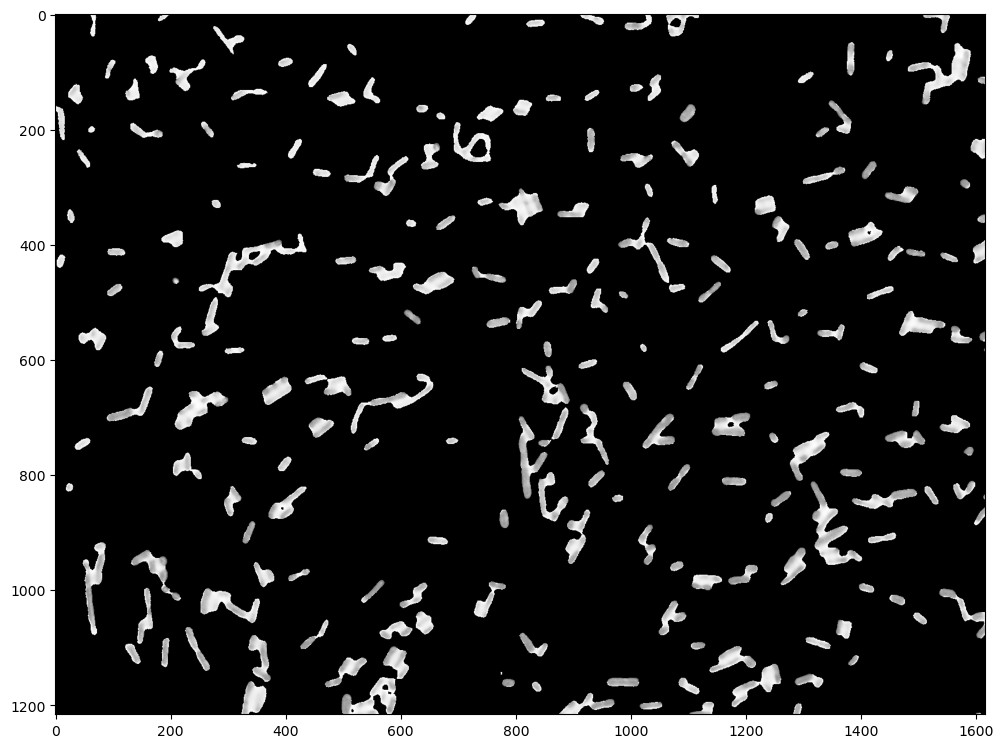

In [11]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria_filtered_hsv_thresholded, cmap='gray')
plt.show()

Drawing contours on image

In [12]:
bacteria_filtered_contours = sorted(cv2.findContours(cv2.threshold(bacteria_filtered_hsv[:,:,0],80,180,cv2.THRESH_BINARY)[1], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0], key = cv2.contourArea, reverse= True)
bacteria_filtered_contours_drawn = bacteria_filtered.copy()
bacteria_filtered_contours_drawn = cv2.drawContours(bacteria_filtered_contours_drawn,
                                                     bacteria_filtered_contours,
                                                     contourIdx=-1, color=(0, 255, 0), thickness=2)

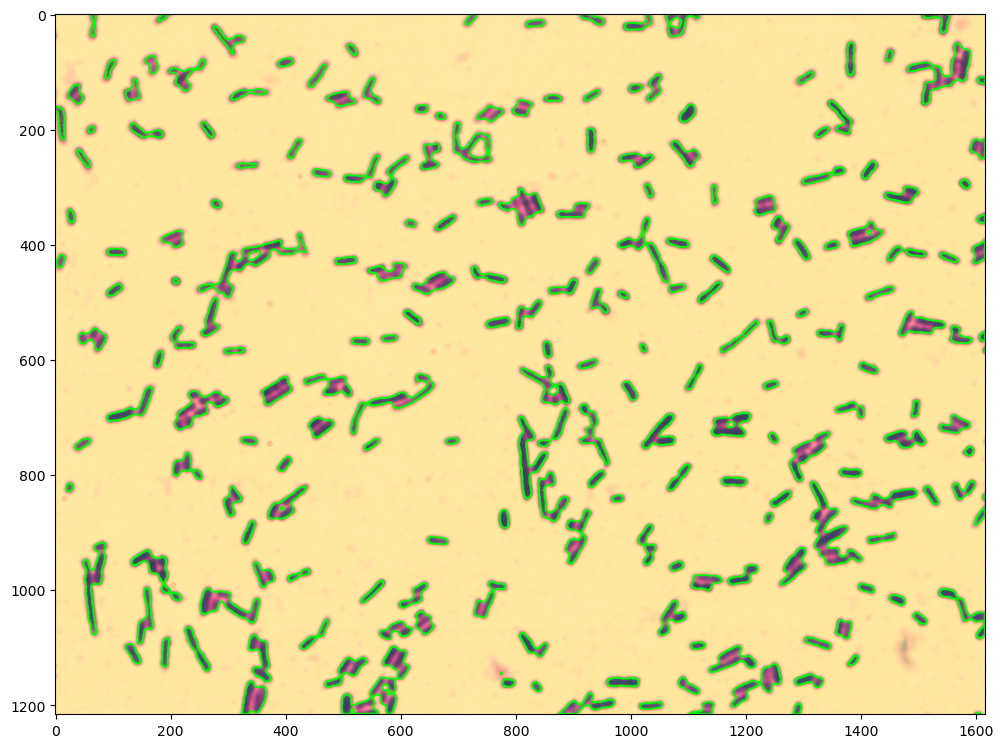

In [13]:
plt.figure(figsize = (12,10))
plt.imshow(bacteria_filtered_contours_drawn[:,:,::-1])
plt.show()

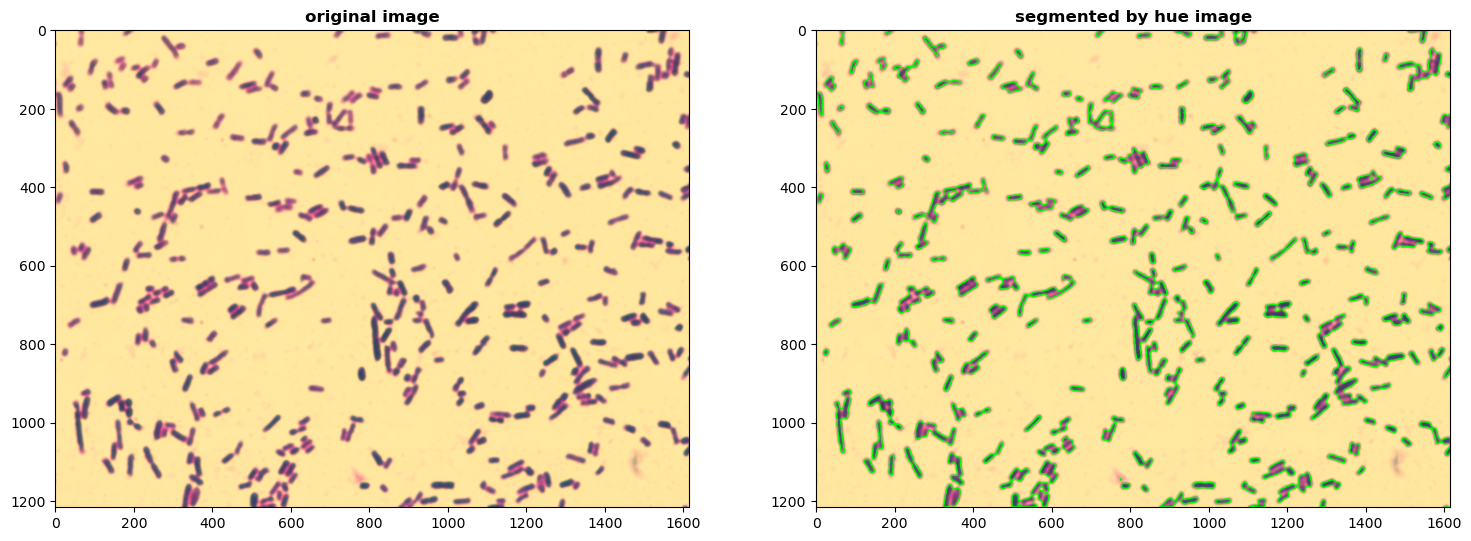

In [14]:
fig, axs = plt.subplots(1,2,figsize=(18,12))
axs[0].imshow(bacteria_filtered[:,:,::-1])
axs[0].set_title('original image', weight='bold')

axs[1].imshow(bacteria_filtered_contours_drawn[:,:,::-1])
axs[1].set_title('segmented by hue image', weight='bold')

plt.show()

# Extracting segmented regions from image for further analysis

In [15]:
len(bacteria_filtered_contours)

228

In [16]:
bacteria_filtered_contours[42].shape

(90, 1, 2)

In [17]:
x, y, w, h = cv2.boundingRect(sorted(bacteria_filtered_contours, key=np.shape, reverse=True)[0])
x, y, w, h

(250, 381, 187, 111)

In [18]:
# x = x - 5
# y = y - 5
# w = w + 10
# h = h + 10

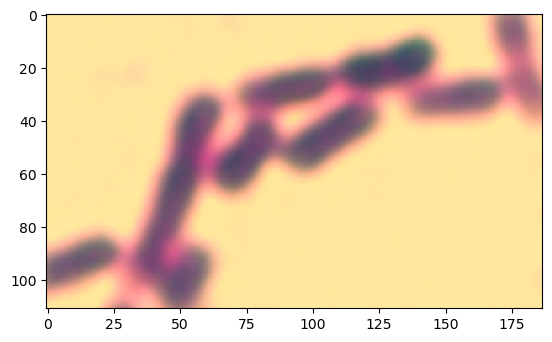

In [19]:
plt.figure()
plt.imshow(bacteria_filtered[y:y + h, x:x + w,::-1])
plt.show()

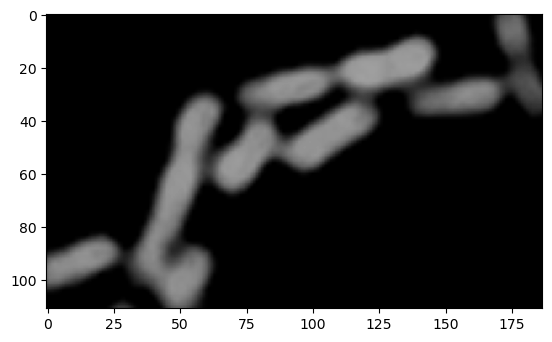

In [20]:
plt.figure()
plt.imshow(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),cmap='gray', vmin=0, vmax=255)
plt.show()

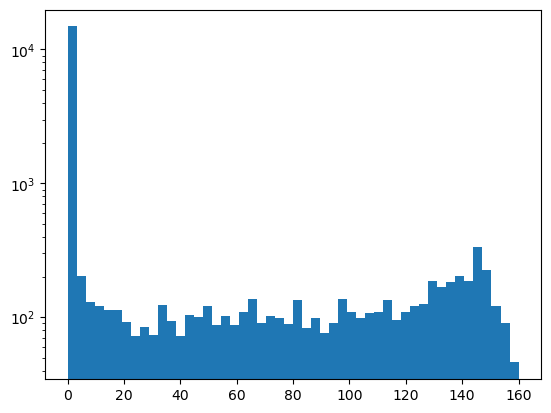

In [21]:
plt.hist(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]).ravel(), bins=50)
plt.yscale('log')

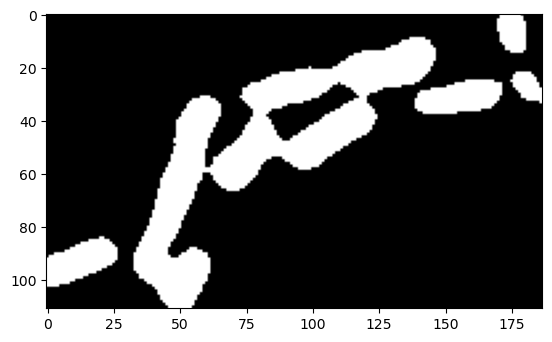

In [22]:
plt.figure()
plt.imshow(cv2.threshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),60,160,cv2.THRESH_BINARY)[1],cmap='gray')
plt.show()

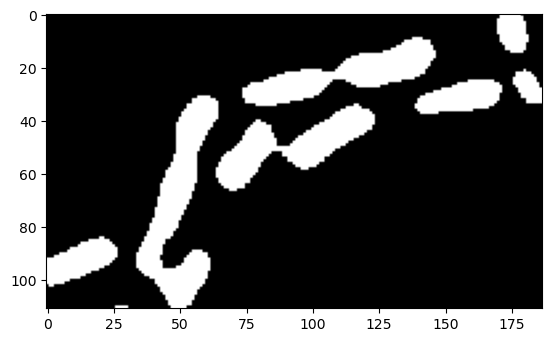

In [23]:
plt.figure()
plt.imshow(cv2.adaptiveThreshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),
                                 160,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, -20),cmap='gray')
plt.show()

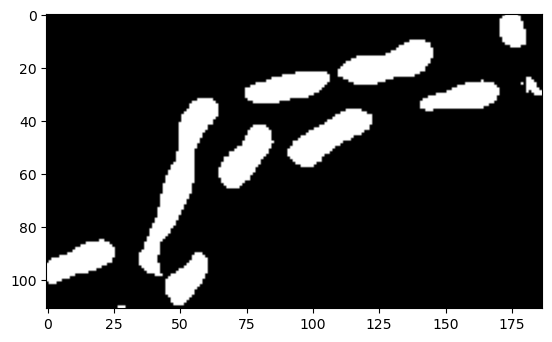

In [24]:
plt.figure()
plt.imshow(cv2.adaptiveThreshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),
                                 160,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, -40),cmap='gray')
plt.show()

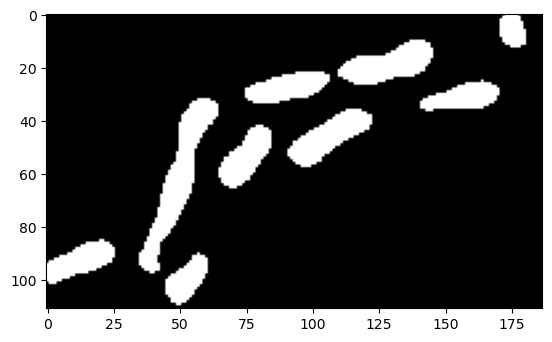

In [25]:
plt.figure()
plt.imshow(morph_op(cv2.adaptiveThreshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),
                                 160,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, -40),
                                 mode = 'open', ksize = 5, iterations = 1),cmap='gray')
plt.show()

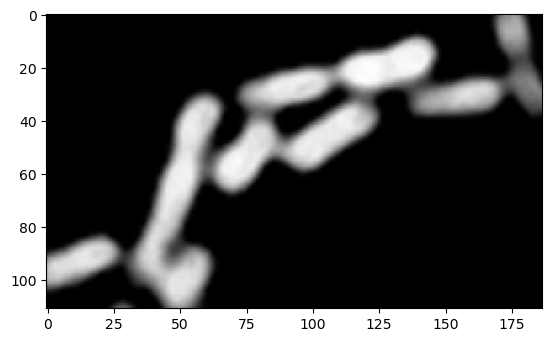

In [26]:
plt.figure()
plt.imshow(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),cmap='gray', vmin=0)
plt.show()

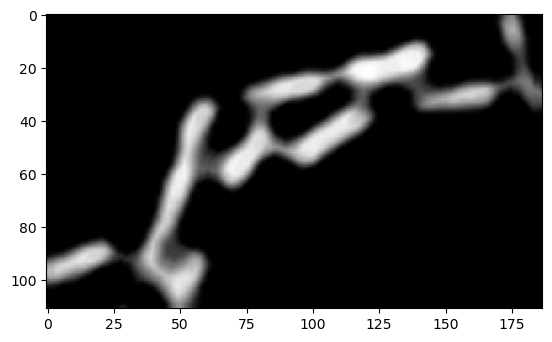

In [27]:
plt.figure()
plt.imshow(morph_op(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),
                     mode = 'erode', ksize = 5, iterations = 1),cmap='gray', vmin=0)
plt.show()

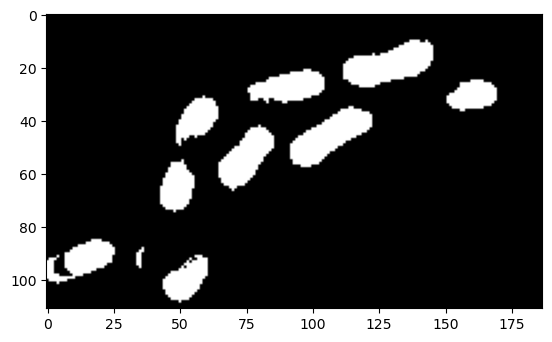

In [28]:
plt.figure()
plt.imshow(cv2.adaptiveThreshold(morph_op(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]), 
                    mode = 'open', ksize = 11, iterations = 1),
                    160,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 23, -35),
                    cmap='gray')

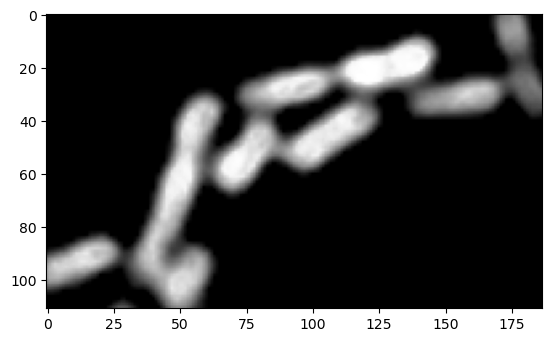

In [29]:
plt.figure()
plt.imshow(cv2.equalizeHist(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2])),cmap='gray', vmin=0, vmax=255)
plt.show()

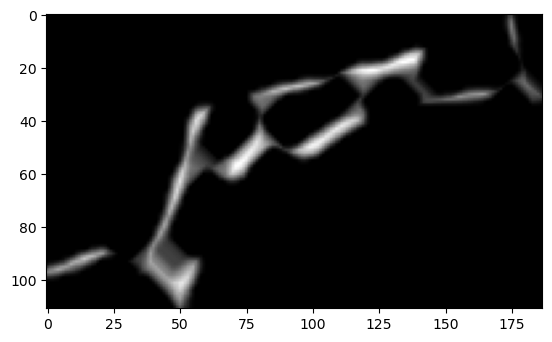

In [30]:
plt.figure()
plt.imshow(morph_op(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),
                     mode = 'erode', ksize = 3, iterations = 5),cmap='gray', vmin=0)
plt.show()

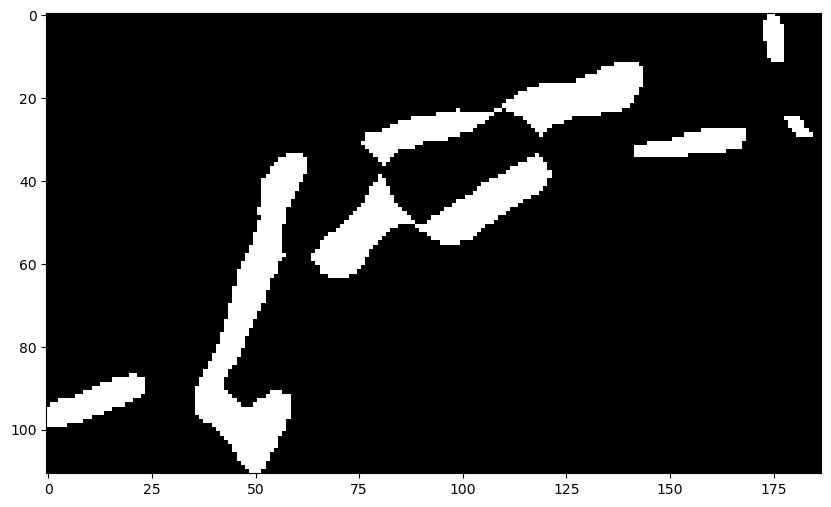

In [31]:
plt.figure(figsize=(10,8))
plt.imshow(morph_op(cv2.threshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),60,160,cv2.THRESH_BINARY)[1],
                    mode = 'erode', ksize = 3, iterations = 3),cmap='gray')
plt.show()

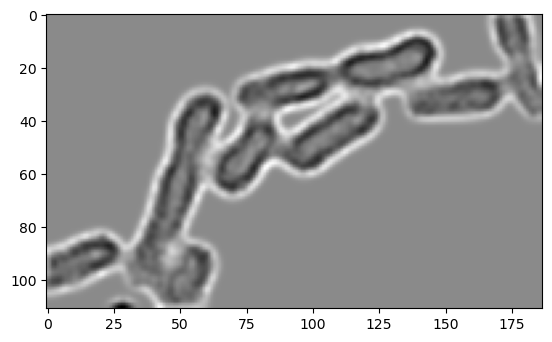

In [32]:
plt.figure()
plt.imshow(cv2.Laplacian(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]), ddepth = cv2.CV_16S, ksize=7),cmap='gray')
plt.show()

In [33]:
from skimage.filters import sobel

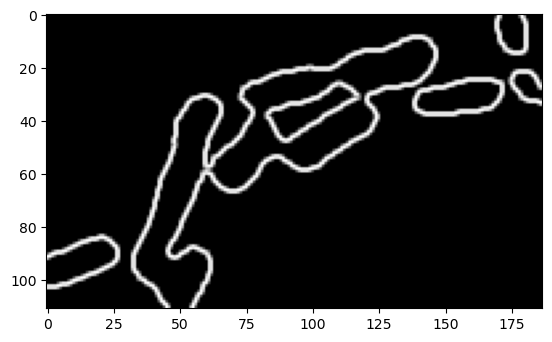

In [34]:
plt.figure()
plt.imshow(sobel(cv2.threshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),60,160,cv2.THRESH_BINARY)[1]),cmap='gray')
plt.show()

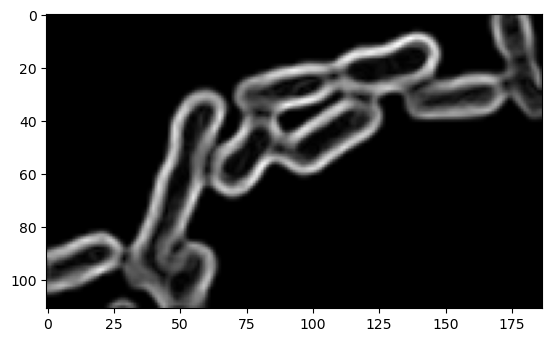

In [35]:
plt.figure()
plt.imshow(sobel(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2])),cmap='gray')
plt.show()

In [36]:
from skimage.segmentation import watershed, mark_boundaries, felzenszwalb, quickshift, slic

In [37]:
bacteria_filtered_hsv_largest_patch = slic(bacteria_filtered[y:y + h, x:x + w,:])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


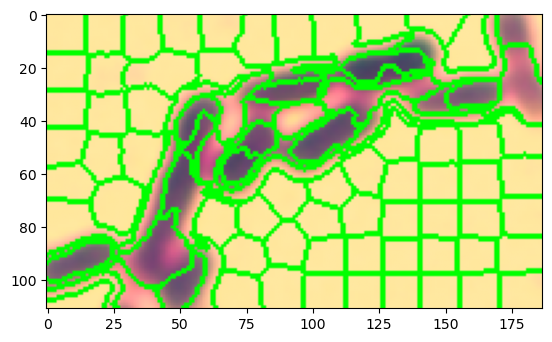

In [38]:
plt.imshow(mark_boundaries(cv2.cvtColor(bacteria_filtered[y:y + h, x:x + w], cv2.COLOR_BGR2RGB), bacteria_filtered_hsv_largest_patch, color=(0, 255, 0)))
plt.show()

In [39]:
bacteria_filtered_hsv_largest_patch = watershed(sobel(cv2.threshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),60,160,cv2.THRESH_BINARY)[1]))

In [40]:
bacteria_filtered_hsv_largest_patch

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [41]:
image = cv2.threshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),60,160,cv2.THRESH_BINARY)[1]
distance = sp.ndimage.distance_transform_edt(image)
coords = skimage.feature.peak_local_max(distance, min_distance=10, labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = sp.ndimage.label(mask)
labels = watershed(-distance, markers, mask=image)

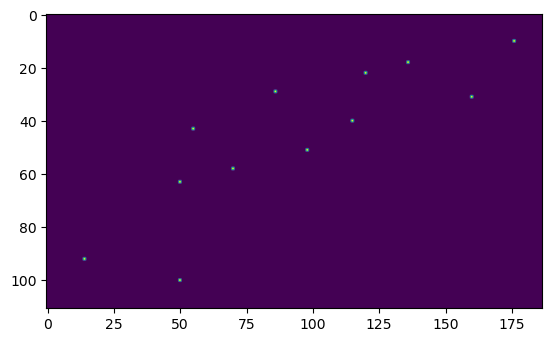

In [42]:
plt.imshow(mask)

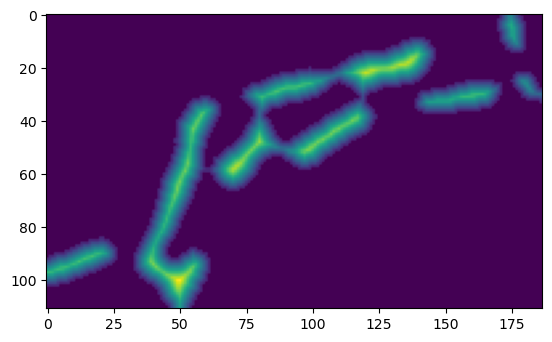

In [43]:
plt.imshow(distance)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


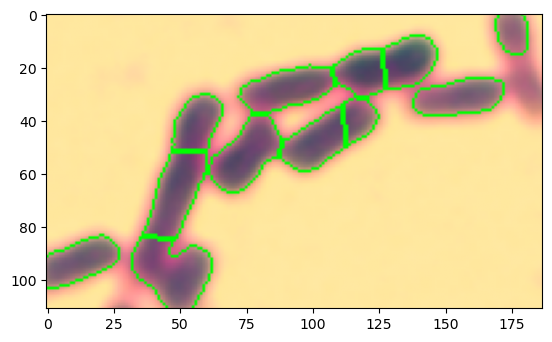

In [44]:
plt.imshow(mark_boundaries(cv2.cvtColor(bacteria_filtered[y:y + h, x:x + w], cv2.COLOR_BGR2RGB), labels, color=(0, 255, 0)))
plt.show()

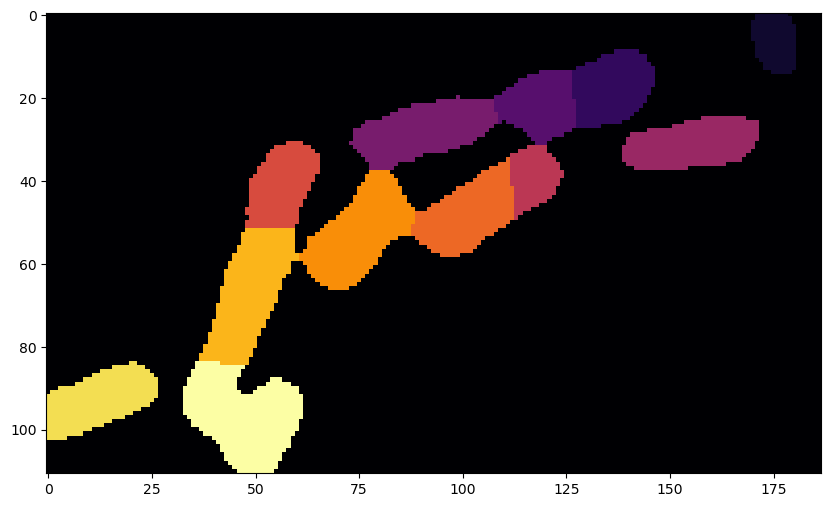

In [45]:
plt.figure(figsize=(10,6))
plt.imshow(labels, cmap='inferno')

In [46]:
np.where(cv2.threshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),60,160,cv2.THRESH_BINARY)[1])

(array([  0,   0,   0, ..., 110, 110, 110], dtype=int64),
 array([171, 172, 173, ...,  52,  53,  54], dtype=int64))

In [47]:
bacteria_coords = np.where(cv2.threshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),60,160,cv2.THRESH_BINARY)[1])

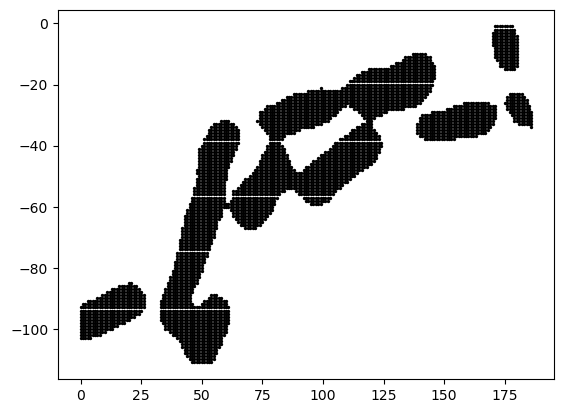

In [48]:
plt.scatter(bacteria_coords[1], np.invert(bacteria_coords[0]), s=2, c='black')

In [49]:
bacteria_proper_coords = np.array([[coord1, coord2] for coord1, coord2 in zip(bacteria_coords[1], np.invert(bacteria_coords[0]))])
bacteria_proper_coords

array([[ 171,   -1],
       [ 172,   -1],
       [ 173,   -1],
       ...,
       [  52, -111],
       [  53, -111],
       [  54, -111]], dtype=int64)

In [50]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering, KMeans

In [51]:
# means_init = np.array([skimage.feature.peak_local_max(distance, min_distance=5, labels=image, num_peaks=10).T[1], 
#           np.invert(skimage.feature.peak_local_max(distance, min_distance=5, labels=image, num_peaks=10).T[0])]).T

In [52]:
gm = GaussianMixture(n_components=10, random_state=0)

In [53]:
bacteria_labels = gm.fit_predict(bacteria_proper_coords)
bacteria_labels

array([7, 7, 7, ..., 2, 2, 2], dtype=int64)

In [54]:
bacteria_proper_coords_labels = np.concatenate((bacteria_proper_coords.T, bacteria_labels.reshape(1,-1)), axis = 0)
bacteria_proper_coords_labels

array([[ 171,  172,  173, ...,   52,   53,   54],
       [  -1,   -1,   -1, ..., -111, -111, -111],
       [   7,    7,    7, ...,    2,    2,    2]], dtype=int64)

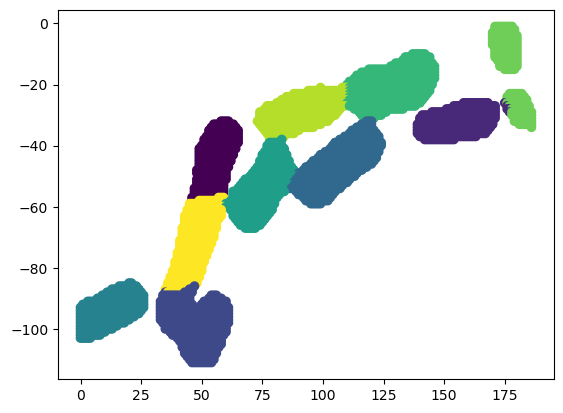

In [55]:
plt.scatter(bacteria_proper_coords_labels[0], bacteria_proper_coords_labels[1], c=bacteria_proper_coords_labels[2])

## One of the most successfull attempts to use watershed

In [61]:
image = cv2.adaptiveThreshold(morph_op(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]), 
                    mode = 'open', ksize = 5, iterations = 1),
                    160,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 23, -35)
distance = sp.ndimage.distance_transform_edt(image)
coords = skimage.feature.peak_local_max(distance, min_distance=0, labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = sp.ndimage.label(mask)
labels = watershed(-distance, markers, mask=cv2.threshold(skimage.util.invert(bacteria_filtered_hsv[y:y + h, x:x + w,2]),60,160,cv2.THRESH_BINARY)[1])

C:\Users\egork\AppData\Local\Temp\ipykernel_6432\2795431050.py:5: RuntimeWarning: When min_distance < 1, peak_local_max acts as finding image > max(threshold_abs, threshold_rel * max(image)).
  coords = skimage.feature.peak_local_max(distance, min_distance=0, labels=image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


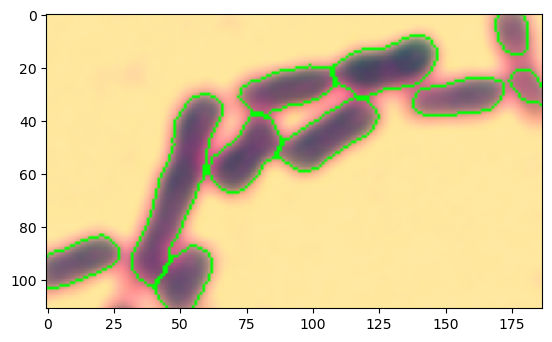

In [62]:
plt.imshow(mark_boundaries(cv2.cvtColor(bacteria_filtered[y:y + h, x:x + w], cv2.COLOR_BGR2RGB), labels, color=(0, 255, 0)))
plt.show()